In [1]:
## IMporting Libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
## data gathering
data = pd.read_csv('iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
## Data Pre-Processing
data.drop(['Id'], axis=1, inplace=True)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
## Labeling
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encodedY = encoder.fit(data[['Species']])
labeledY = encoder.transform(data[['Species']])
labeledY

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [17]:
## Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
scaledX = scaler.fit_transform(data[['SepalLengthCm', 'SepalWidthCm']])
scaledX

array([[-0.90068117,  1.03205722],
       [-1.14301691, -0.1249576 ],
       [-1.38535265,  0.33784833],
       [-1.50652052,  0.10644536],
       [-1.02184904,  1.26346019],
       [-0.53717756,  1.95766909],
       [-1.50652052,  0.80065426],
       [-1.02184904,  0.80065426],
       [-1.74885626, -0.35636057],
       [-1.14301691,  0.10644536],
       [-0.53717756,  1.49486315],
       [-1.26418478,  0.80065426],
       [-1.26418478, -0.1249576 ],
       [-1.87002413, -0.1249576 ],
       [-0.05250608,  2.18907205],
       [-0.17367395,  3.11468391],
       [-0.53717756,  1.95766909],
       [-0.90068117,  1.03205722],
       [-0.17367395,  1.72626612],
       [-0.90068117,  1.72626612],
       [-0.53717756,  0.80065426],
       [-0.90068117,  1.49486315],
       [-1.50652052,  1.26346019],
       [-0.90068117,  0.56925129],
       [-1.26418478,  0.80065426],
       [-1.02184904, -0.1249576 ],
       [-1.02184904,  0.80065426],
       [-0.7795133 ,  1.03205722],
       [-0.7795133 ,

In [16]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [18]:
## Divide Train Test Data
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    scaledX, labeledY, 
    test_size=0.2, random_state=49
)
xtrain.shape, ytrain.shape

((120, 2), (120,))

In [40]:
## MOdeling
from sklearn import neighbors

##Initialize
knn = neighbors.KNeighborsClassifier(n_neighbors=5)

## Training
knn.fit(xtrain, ytrain)

## Test Prediction
ypred = knn.predict(xtest)

ypred == ytest, encoder.inverse_transform(ypred)

(array([ True, False,  True,  True,  True,  True, False, False,  True,
         True,  True,  True,  True,  True,  True, False, False,  True,
         True,  True,  True, False,  True,  True,  True, False,  True,
         True,  True, False]),
 array(['Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
        'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
        'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
        'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
        'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
        'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
        'Iris-versicolor'], dtype=object))

In [27]:
## Evaluation
from sklearn.metrics import confusion_matrix, f1_score
print('Confusion Matrix: \n', confusion_matrix(ytest, ypred))
print('F1 Score: ', f1_score(ytest, ypred, average='weighted'))

Confusion Matrix: 
 [[8 0 0]
 [0 7 3]
 [0 5 7]]
F1 Score:  0.7333333333333335


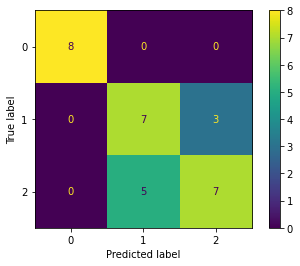

In [28]:
## Evaluation Plot
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(knn, xtest, ytest)

In [31]:
data.head(), data[['Species']].value_counts()

(   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
 0            5.1           3.5            1.4           0.2  Iris-setosa
 1            4.9           3.0            1.4           0.2  Iris-setosa
 2            4.7           3.2            1.3           0.2  Iris-setosa
 3            4.6           3.1            1.5           0.2  Iris-setosa
 4            5.0           3.6            1.4           0.2  Iris-setosa,
 Species        
 Iris-setosa        50
 Iris-versicolor    50
 Iris-virginica     50
 dtype: int64)

In [37]:
setosa = data[data['Species'] == 'Iris-setosa']
versicolor = data[data['Species'] == 'Iris-versicolor']
virginica = data[data['Species'] == 'Iris-virginica']

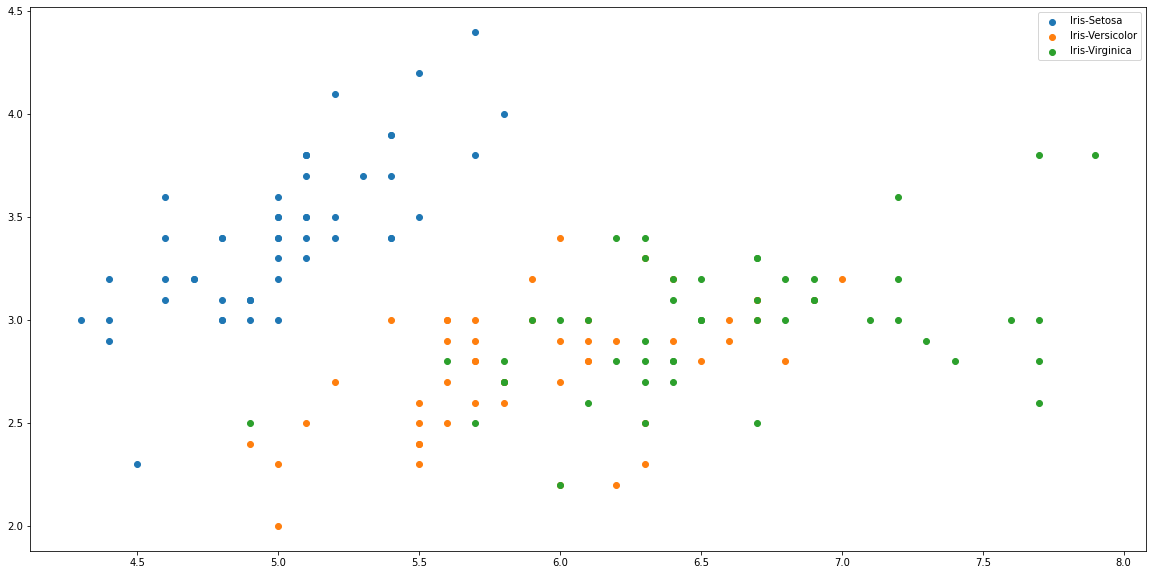

In [38]:
fig, axes = plt.subplots(1,1, figsize=(20,10))
axes.scatter(setosa[['SepalLengthCm']], setosa[['SepalWidthCm']], label = 'Iris-Setosa')
axes.scatter(versicolor[['SepalLengthCm']], versicolor[['SepalWidthCm']], label = 'Iris-Versicolor')
axes.scatter(virginica[['SepalLengthCm']], virginica[['SepalWidthCm']], label = 'Iris-Virginica')
plt.legend()
plt.show()

In [ ]:
## Task 